In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim
from tqdm import tqdm

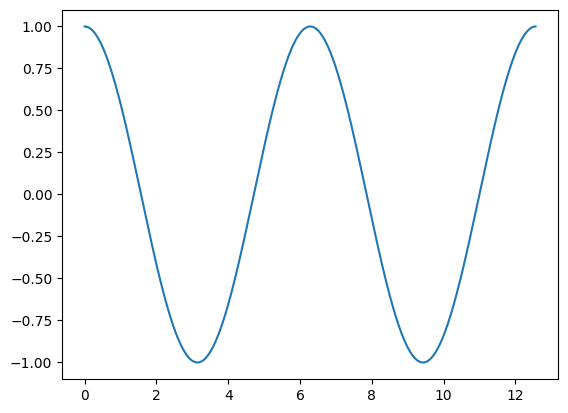

In [3]:
xs = torch.arange(0,4*np.pi,step=0.01)
ys = torch.cos(xs)
plt.plot(xs, ys)

In [4]:
inds = torch.randint(low=0,high=1257,size=(500,))

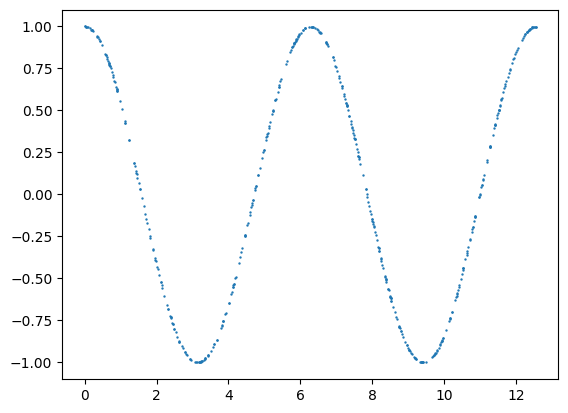

In [5]:
plt.scatter(xs[inds],ys[inds],s=0.5)

In [6]:
x_train = xs[inds]
y_train = ys[inds]

In [8]:
m = nn.Linear(x_train.size(0),y_train.size(0))
m(x_train).size()

torch.Size([500])

In [98]:
class cos_model(nn.Module):
    def __init__(self,xs):
        super(cos_model, self).__init__()
        in_chann = xs.size(0)
        final_out_chann = xs.size(0)
        self.net = nn.Sequential(
            nn.Linear(in_chann, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            nn.Linear(100,300),
            nn.ReLU(),
            nn.Linear(300,final_out_chann)
        )

    def forward(self, xs):
        return self.net(xs)

In [105]:
lr = 1e-1
model = cos_model(xs)
optimizer = optim.SGD(model.parameters(), lr=lr)
objective = nn.MSELoss()
epochs = 150

for epoch in tqdm(range(epochs)):
    optimizer.zero_grad()

    y_hat = model(xs)
    loss = objective(ys, y_hat)

    loss.backward()
    optimizer.step()

with torch.no_grad():
    model.eval()
    ys_pred = model(xs).detach()

100%|██████████| 150/150 [00:00<00:00, 1152.30it/s]


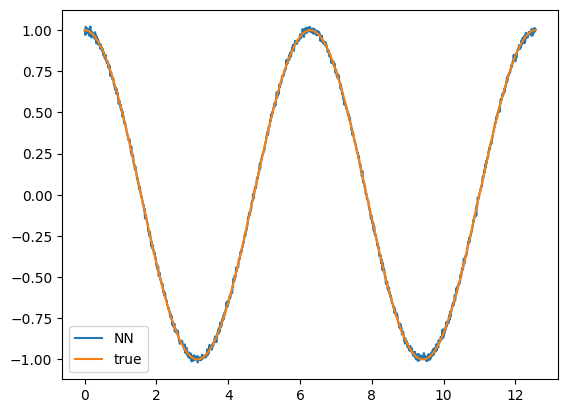

In [108]:
plt.plot(xs,ys_pred,label="NN")
plt.plot(xs,ys,label="true")
plt.legend()

In [109]:
print(model)

cos_model(
  (net): Sequential(
    (0): Linear(in_features=1257, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=300, bias=True)
    (5): ReLU()
    (6): Linear(in_features=300, out_features=1257, bias=True)
  )
)
